<a href="https://colab.research.google.com/github/Vasavipilli/FMML_ASSIGNMENTS_AND_LABS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

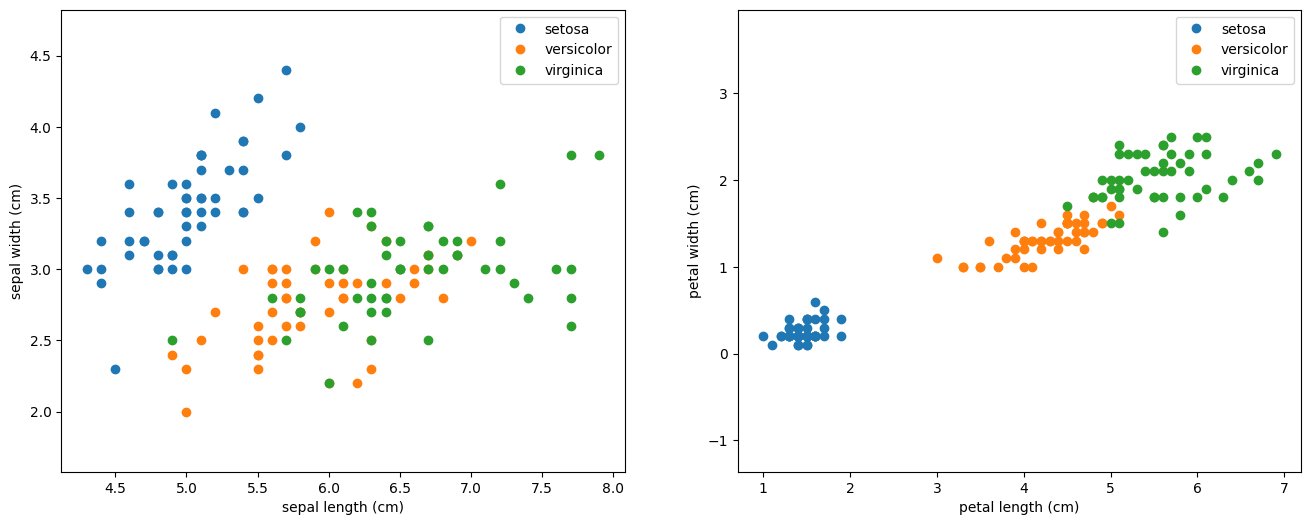

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 97.67it/s]


# Plot training progress

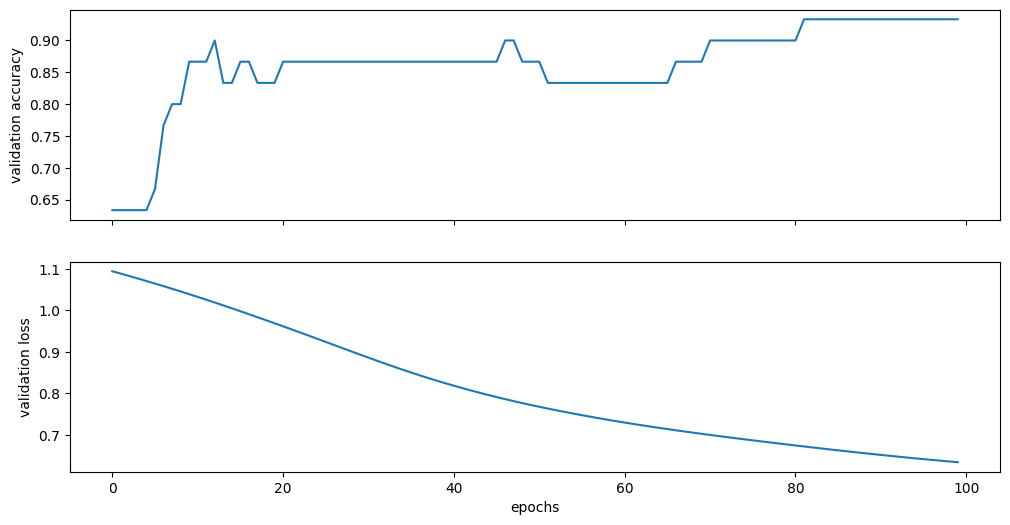

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

3.Sure! Activation functions play a crucial role in artificial neural networks by introducing non-linearity, allowing the network to learn complex patterns and relationships in the data. Let's try using the rectified linear unit (ReLU) activation function, which is one of the most commonly used activation functions:

ReLU(x) = max(0, x)

This function returns 0 for negative inputs and returns the input value for non-negative inputs. It's simple and computationally efficient, often leading to faster convergence during training. Would you like to see how it can be implemented in a specific context?







2.Certainly! Changing the number of neurons in the hidden layer can also have a significant impact on the behavior and performance of a neural network. Here's how varying the number of neurons can affect the model:

Fewer Neurons: Using fewer neurons in the hidden layer can lead to a simpler model with fewer parameters. This might help prevent overfitting, especially if the dataset is small or if the problem is relatively simple. However, a model with too few neurons may struggle to capture complex patterns in the data, leading to underfitting.

More Neurons: Increasing the number of neurons in the hidden layer allows the model to learn more complex representations of the data. This can be beneficial for tackling more intricate problems and datasets with high dimensionality. However, a large number of neurons may also increase the risk of overfitting, especially if the model doesn't have enough training data to learn from.

When adjusting the number of neurons in the hidden layer, it's crucial to strike a balance between model complexity and generalization performance. Regularization techniques, such as dropout or L2 regularization, can help mitigate overfitting when using larger hidden layers. Experimenting with different configurations and monitoring the model's performance on validation data can guide the selection of an appropriate number of neurons for the hidden layer.







1.Sure, changing the number of hidden layers in a neural network architecture can significantly impact its performance and capabilities. Adding more hidden layers can potentially allow the network to learn more complex features and relationships in the data, but it also increases the risk of overfitting, where the model memorizes the training data rather than generalizing well to new, unseen data.

On the other hand, reducing the number of hidden layers may simplify the model and reduce the risk of overfitting, but it might also limit the model's ability to capture complex patterns in the data.

When experimenting with the number of hidden layers, it's essential to monitor the model's performance on a validation dataset to ensure that it's not overfitting or underfitting. Additionally, factors such as the size of the dataset, the complexity of the problem, and computational resources should be considered when deciding on the architecture of the neural network